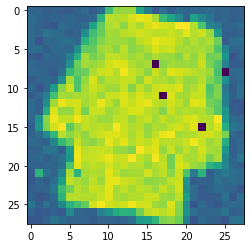

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
train_df = np.load(R"D:/Github/MAIS202/Kaggle-Comp/train_images.npy")
test_df = np.load(R"D:/Github/MAIS202/Kaggle-Comp/test_images.npy")

train_df = train_df /255
test_df = test_df /255
# train_data = np.array(train_df, dtype = 'float32')
# test_data = np.array(test_df, dtype='float32')

train_labels_CSV = R"D:/Github/MAIS202/Kaggle-Comp/train_labels.csv"

train_labels = np.array((pd.read_csv(train_labels_CSV, index_col = 'ID')) ).astype(int)


#labels

# Any results you write to the current directory are saved as output.

import matplotlib.pyplot as plt
plt.imshow(train_df[55])
plt.show()

In [3]:
#Creating a dataset
import torch 
from torch.utils.data import Dataset, DataLoader


class fashionDataSet(Dataset):
    def __init__(self, data, target, transform =None):
        self.data = data.reshape(-1,28,28,1).astype('float32')
        self.target = target
        self.transform = transform
        
    def __getitem__ (self, index):
        image = self.data[index]
        label = self.target[index]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label
    
    def __len__(self):
        return len(self.data)
    
    
        

In [4]:
import torchvision.transforms as transforms


val_percent = 0.2
val_size = int ( len (train_df) * val_percent)


from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(train_df, train_labels, test_size=0.2, random_state = 1, shuffle = True)

BATCHSIZE = 100

train_set = fashionDataSet(train_x, train_y, transform = transforms.Compose([transforms.ToTensor()]))

val_set = fashionDataSet(val_x,val_y, transform = transforms.Compose([transforms.ToTensor()]))


train_loader = DataLoader(train_set, batch_size=BATCHSIZE)

val_loader = DataLoader (val_set, batch_size = BATCHSIZE)



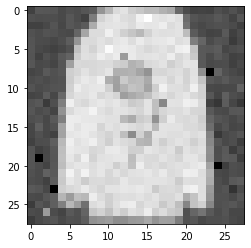

In [5]:
import matplotlib.pyplot as plt

image, label = next (iter(train_set))

plt.imshow(image.squeeze(), cmap = "gray")
plt.show()

(28, 28)


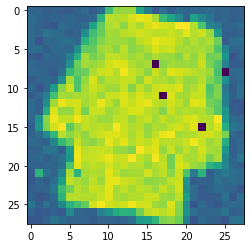

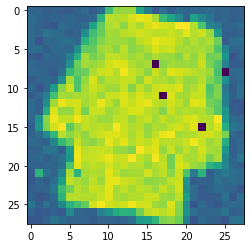

In [6]:


#view Image. For some reason I get black pixels

def show_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()
 # 0 is the index of the training image you want to display
print (train_df[2].shape)
plt.imshow(train_df[55])
plt.show()
show_image(train_df[55])

In [7]:
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tnrange, tqdm_notebook

In [8]:
class CNN (nn.Module):

    def __init__(self):
        super(CNN,self).__init__()

#         self.conv_layer1 = nn.Sequential ( 
#             nn.Conv2d(1,64, 3, 1,1),  #size
#             nn.BatchNorm2d(64),   # BATCH NORM REG BEST REG
#             nn.ReLU(inplace = True), 

#             nn.MaxPool2d (2, stride=2)#size 14
#         )

#         self.conv_layer3 = nn.Sequential (

#             nn.Conv2d(64,128,3,1),
#             nn.BatchNorm2d(128),
#             nn.ReLU(inplace = True),

#             nn.MaxPool2d (2, stride=2) #results in size 6
#         )
        
#         self.conv_layer4 = nn.Sequential (
        
#             nn.Conv2d(128,128,3,1,1),
#             nn.BatchNorm2d(128),
#             nn.ReLU(inplace = True),
            
#             nn.Conv2d(128,128,3,1,1),
#             nn.BatchNorm2d(128),
#             nn.ReLU(inplace = True),
            
#             nn.Conv2d(128,256,3,1,1),
#             nn.BatchNorm2d(256),
#             nn.ReLU(inplace = True),
            
#             nn.Conv2d(256,512,3,1,1),
#             nn.BatchNorm2d(512),
#             nn.ReLU(inplace = True),
            
#             nn.MaxPool2d(2,stride=2)
        
#         )

#         self.fc1= nn.Linear(3*3*512, 1000 )
#         self.norm1 = nn.BatchNorm1d(1000)
#         self.drop = nn.Dropout2d(0.5)
#         self.fc2 = nn.Linear(1000, 400)
#         self.norm2 = nn.BatchNorm1d(400)
#         self.fc3 = nn.Linear ( 400, 10)

#     def forward(self, x):
#         out = self.conv_layer1(x)
#       #  out = self.conv_layer2(out)
#         out = self.conv_layer3(out)
#         out = self.conv_layer4(out)
        
#         out = out.view (-1, 3*3*512)

#         out = self.norm1(self.fc1(out) )
#         out = F.relu(out)
#         out = self.drop(out)

#         out = self.norm2(self.fc2(out))
#         out = F.relu(out)
#         out = self.drop(out)

#         out = self.fc3(out)

#         return out

        self.conv_layer1 = nn.Sequential ( 
            nn.Conv2d(1,256, 3, 1,1),  #size
            nn.BatchNorm2d(256),   # BATCH NORM REG BEST REG
            nn.ReLU(inplace = True), 
            
            nn.Conv2d(256,256,3,1,1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True),
            
            nn.Conv2d(256,256,3,1,1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True),

            nn.Conv2d(256,256,3,1,1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True),

            # nn.Conv2d(256,256,3,1,1),
            # nn.BatchNorm2d(256),
            # nn.ReLU(inplace = True),




            

            nn.MaxPool2d (2, stride=2)#size 14
        )
    
        self.conv_layer3 = nn.Sequential (

            nn.Conv2d(256,512,3,1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace = True),
                
            nn.Conv2d(512,512,3,1,1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace = True),

            nn.Conv2d(512,512,3,1,1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace = True),    


            nn.MaxPool2d (2, stride=2) #results in size 7
        )

    

        self.fc1= nn.Linear(6*6*512, 300 )
        self.norm1 = nn.BatchNorm1d(300)
        self.drop1 = nn.Dropout2d(0.5)
        self.fc2 = nn.Linear(300, 32)
        self.norm2 = nn.BatchNorm1d(32)
        self.drop2 = nn.Dropout2d(0.5)
        self.fc3 = nn.Linear ( 32, 10)

    def forward(self, x):
        out = self.conv_layer1(x)
      #  out = self.conv_layer2(out)
        out = self.conv_layer3(out)
        
        
        out = out.view (-1, 6*6*512)

        out = self.norm1(self.fc1(out) )
        out = F.relu(out)
        out = self.drop1(out)

        out = self.norm2(self.fc2(out))
        out = F.relu(out)
        out = self.drop2(out)

        out = self.fc3(out)

        return out





In [9]:
class simple_CNN(nn.Module):
    def __init__(self):
        super(simple_CNN,self).__init__()
        
        
        self.conv1 = nn.Conv2d(1,32,3,1)
        self.norm = nn.BatchNorm2d(32)
        self.drop = nn.Dropout2d(0.2)
        
        self.pool = nn.MaxPool2d(2, stride=2)
        
        self.fc1 = nn.Linear(13*13*32,400)
        self.norm2 = nn.BatchNorm1d(400)
        self.fc2 = nn.Linear(400,10)
        
    def forward(self, x):
        
        out = F.relu(self.norm(self.conv1(x)) )
        out = self.pool(out)
        
        out= out.view(-1,13*13*32)
        out = self.fc1(out)
        out = self.norm2(out) 
        out = F.relu(out)
        out = self.fc2(out)
        
        return out
        
        
        
        


In [10]:
change = {
    
    "acc": 0.8783,
    "change": {
        
        "dropout": "Layer 1:0.4, Layer 2: 0.2",
        
        "Activation Layers": "2 conv Layers, Start at 256",
        
        "FC Layers": "3 layers: 1000, 400, 10"
        
    }
    
}

best_acc = [change]

Iteration: 0 Training loss: 0.024438250064849853, train acc: 0.12, val loss: 0.023073295131325722, val acc:0.102 
Iteration: 50 Training loss: 0.017142594187867406, train acc: 0.503921568627451, val loss: 0.01521454006433487, val acc:0.7298 
Iteration: 100 Training loss: 0.01603722280795031, train acc: 0.5662376237623762, val loss: 0.013424604199826717, val acc:0.7757 
Iteration: 150 Training loss: 0.015459703735957873, train acc: 0.5981456953642384, val loss: 0.012506569735705853, val acc:0.7884 
Iteration: 200 Training loss: 0.015011431992943608, train acc: 0.6197512437810945, val loss: 0.01237597968429327, val acc:0.8083 
Iteration: 250 Training loss: 0.014601923141821448, train acc: 0.6389243027888446, val loss: 0.011693024076521397, val acc:0.8247 
Iteration: 300 Training loss: 0.014286337884953648, train acc: 0.6525913621262458, val loss: 0.01097993552684784, val acc:0.8175 
Iteration: 350 Training loss: 0.013938473785704697, train acc: 0.6662678062678062, val loss: 0.01047397777

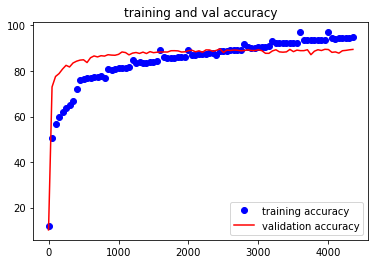

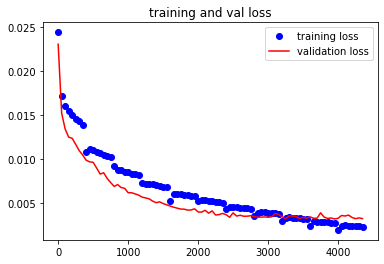

In [11]:
import tqdm

from ipywidgets import FloatProgress


def train_model (model, EPOCHS=3):
    model.train()
    iteration = []
    
    training_loss = []
    training_accuracy = []
    
    valid_loss = []
    valid_accuracy = []
    
    count = 0
    
    best_acc = 0.0
    model_save = model.state_dict()
    
    for epoch in range(EPOCHS):
        running_loss = 0.0
        running_count = 0
        running_total = 0
        for data in train_loader:
            
            images, labels = data
            
            images = images.to(device)
            labels = labels.to(device)
            
            
            optimizer.zero_grad()
            
            outputs = model(images.view(-1,1,28,28))
            
#             print (outputs.size(0))
#             print ( labels.squeeze(1).long().size(0))
            
            loss = loss_function(outputs, labels.squeeze(1).long())
            
            loss.backward()
            
            
            
            optimizer.step()
            
            pred = torch.max(outputs,1)[1]

            correct_list = (pred == labels.squeeze(1) )
            running_count += correct_list.sum().item()
            running_total += len(pred)
            
            running_loss += loss.item()
            
            if count % 50 == 0:
                model.eval()
                val_loss = 0
                val_count = 0
                val_total = 0
                with torch.no_grad():
                    for val_image, val_label in val_loader:
                        val_image = val_image.to(device)
                        val_label = val_label.to(device)
                        
                        output = cnn(val_image.view(-1,1,28,28))
                        
                        pred = torch.max(output,1)[1]
                        
                        val_cor = (pred == val_label.squeeze(1))
                        val_count += val_cor.sum().item()
                        val_total += len(pred)
                        
                        val_loss += loss_function(output, val_label.squeeze(1).long())
                        
                model.train()
                
                valid_loss.append (val_loss/val_total)
                valid_accuracy.append( (val_count/val_total) *100)
                
                training_loss.append( (running_loss/running_total))
                training_accuracy.append ( (running_count/running_total) * 100)
                
                iteration.append(count)
                
                
                if (val_count/val_total) > best_acc:
                    best_acc = (val_count / val_total)
                    model_save = model.state_dict()
                
                print("Iteration: {} Training loss: {}, train acc: {}, val loss: {}, val acc:{} ".format(count,running_loss/running_total, running_count/running_total, val_loss/val_total, val_count/val_total))

            count +=1
    print (best_acc)
    return model_save, iteration, training_loss, training_accuracy, valid_loss, valid_accuracy, best_acc

def show_train_plots(x_axis, train_loss, train_acc, val_loss, val_acc):
    plt.plot ( x,train_acc, 'bo', label = 'training accuracy')

    plt.plot ( x,val_acc, 'b', label = 'validation accuracy',color = 'red')
    plt.title ('training and val accuracy')
    plt.legend()
    plt.figure
    plt.show()

    plt.plot ( x,train_loss, 'bo', label = 'training loss')

    plt.plot (x, val_loss, 'b', label = 'validation loss', color='red')
    plt.title ('training and val loss')
    plt.legend()
    plt.figure

    plt.show()

    

cnn = CNN()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

cnn = cnn.to(device)

EPOCHS = 11

learning_rate = 1e-4
loss_function = nn.CrossEntropyLoss()

optimizer = optim.Adam(cnn.parameters(), lr = learning_rate)

my_model, x, t_loss, t_acc, v_loss,v_acc, best = train_model (cnn, EPOCHS)


show_train_plots(x, t_loss, t_acc, v_loss, v_acc)

change = {
    
    "acc": best,
    "change": {
        
        "dropout": "Layer 1:0.2, Layer 2: 0.2",
        
        "Activation Layers": "2 conv Layers, first layer deeper, Start at 256",
        
        "FC Layers": "3 layers: 300, 32, 10"
        
    }
    
}

best_acc.append(change)


PATH = './FASHION_net.pth'

torch.save (my_model, PATH)














In [12]:


print(best_acc)

[{'acc': 0.8783, 'change': {'dropout': 'Layer 1:0.4, Layer 2: 0.2', 'Activation Layers': '2 conv Layers, Start at 256', 'FC Layers': '3 layers: 1000, 400, 10'}}, {'acc': 0.8968, 'change': {'dropout': 'Layer 1:0.2, Layer 2: 0.2', 'Activation Layers': '2 conv Layers, first layer deeper, Start at 256', 'FC Layers': '3 layers: 300, 32, 10'}}]


In [13]:
from torch.utils import data

test_cnn = CNN()

test_cnn = test_cnn.to(device)



test_cnn.load_state_dict(torch.load(PATH))

test_cnn.eval()

test_image = test_df.reshape(-1,28,28,1).astype('float32')
    
test_tensor = torch.from_numpy(test_image)


test_dataset = data.TensorDataset(test_tensor)

test_data_loader = data.DataLoader(test_dataset)

a = next(iter(test_data_loader))

def test_model(model,test_loader):
    predictions = []
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            
            image = data[0]
            
            image = image.to(device)
            
            
            outcome = model(image.view(-1,1,28,28))

            prediction = torch.max(outcome,1)[1]
            
            predictions.append(prediction.item())

    print (predictions)
    return predictions

test_predict = test_model(test_cnn, test_data_loader)


test_submit = pd.read_csv('sample_submission.csv')
test_submit['label'] = test_predict
test_submit.to_csv('submission.csv', index=False)



, 4, 5, 3, 0, 9, 9, 3, 8, 1, 9, 6, 0, 0, 6, 4, 9, 6, 3, 0, 1, 4, 3, 8, 4, 1, 5, 2, 4, 1, 6, 2, 3, 3, 2, 9, 5, 1, 8, 8, 6, 8, 0, 8, 1, 0, 8, 4, 4, 1, 1, 9, 6, 7, 1, 4, 6, 8, 6, 6, 4, 7, 5, 3, 7, 8, 4, 6, 7, 7, 9, 9, 6, 5, 1, 0, 7, 5, 9, 2, 4, 4, 8, 0, 8, 6, 5, 9, 0, 7, 9, 1, 1, 1, 4, 2, 8, 6, 3, 4, 6, 0, 4, 6, 9, 9, 2, 4, 7, 6, 0, 4, 1, 6, 5, 4, 0, 6, 1, 2, 3, 8, 7, 9, 0, 9, 6, 9, 8, 0, 2, 7, 0, 5, 2, 0, 2, 7, 9, 8, 7, 6, 7, 8, 5, 5, 6, 0, 1, 2, 3, 1, 0, 6, 3, 2, 5, 0, 3, 7, 0, 7, 6, 6, 9, 7, 0, 3, 2, 5, 2, 9, 9, 9, 6, 0, 0, 1, 8, 1, 5, 6, 2, 2, 4, 0, 7, 7, 5, 1, 8, 3, 9, 2, 5, 5, 0, 0, 6, 9, 2, 7, 0, 2, 6, 6, 7, 5, 7, 5, 7, 0, 0, 6, 4, 6, 6, 9, 3, 5, 9, 4, 6, 6, 7, 1, 5, 6, 2, 1, 9, 2, 8, 1, 6, 2, 4, 3, 7, 3, 2, 9, 1, 2, 7, 2, 4, 9, 4, 8, 2, 1, 1, 8, 6, 6, 2, 5, 0, 6, 3, 4, 2, 4, 9, 9, 8, 6, 0, 2, 2, 8, 6, 6, 2, 1, 7, 0, 8, 7, 2, 9, 8, 1, 6, 2, 6, 3, 9, 4, 1, 9, 1, 6, 6, 1, 6, 1, 6, 2, 8, 6, 7, 1, 6, 7, 8, 5, 1, 1, 1, 6, 5, 2, 5, 9, 9, 3, 4, 2, 2, 1, 1, 4, 7, 5, 9, 4, 8, 6, 7, 4, 9, 6,

In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

cnn = cnn.to(device)